## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/final/02_class_dedornot_ra.csv')

In [4]:
df.head()

,Index,Patient=1,Actinobacteria,Bacilli,Betaproteobacteria,Gammaproteobacteria,Clostridia,Alphaproteobacteria,Bacteroidia,Chloroplast,...,Chloroflexia,Lentisphaeria,Nitrospira,Chlamydiae,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.172532,0.095528,0.043398,0.029704,0.198002,0.112001,0.059010,0.03493,...,0.0,0.0,0.0,0.0,1,65,0,0,NaN,NaN
1,P2,1,0.705676,0.202435,0.005359,0.032681,0.023419,0.017399,0.008071,0.00000,...,0.0,0.0,0.0,0.0,1,67,0,0,31.25,17.0
2,P3,1,0.121972,0.342753,0.032760,0.077895,0.239179,0.068630,0.038319,0.00000,...,0.0,0.0,0.0,0.0,1,33,0,0,33.30,16.0
3,P4,1,0.142101,0.235578,0.159632,0.037708,0.191585,0.190064,0.000000,0.00000,...,0.0,0.0,0.0,0.0,1,66,0,0,93.75,21.0
4,P5,1,0.358740,0.283313,0.052071,0.067156,0.018195,0.055842,0.041749,0.00000,...,0.0,0.0,0.0,0.0,0,69,0,0,6.25,7.0


In [5]:
df.iloc[:,2:44]

,Actinobacteria,Bacilli,Betaproteobacteria,Gammaproteobacteria,Clostridia,Alphaproteobacteria,Bacteroidia,Chloroplast,Cyanobacteria,Coriobacteriia,...,Thermoleophilia,Mollicutes,Epsilonproteobacteria,Melainabacteria,Spartobacteria,Acidobacteria,Chloroflexia,Lentisphaeria,Nitrospira,Chlamydiae
0,0.172532,0.095528,0.043398,0.029704,0.198002,0.112001,0.059010,0.034930,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.705676,0.202435,0.005359,0.032681,0.023419,0.017399,0.008071,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.121972,0.342753,0.032760,0.077895,0.239179,0.068630,0.038319,0.000000,0.0,0.024619,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.142101,0.235578,0.159632,0.037708,0.191585,0.190064,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.358740,0.283313,0.052071,0.067156,0.018195,0.055842,0.041749,0.000000,0.0,0.077015,...,0.007807,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.642054,0.165476,0.007940,0.099378,0.013299,0.025473,0.000000,0.010520,0.0,0.000000,...,0.000000,0.0,0.003507,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.487164,0.450112,0.004036,0.012108,0.034273,0.007940,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.282576,0.050758,0.633181,0.005029,0.002581,0.017471,0.000993,0.000662,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.623379,0.361405,0.002646,0.004631,0.001985,0.001654,0.000000,0.000066,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [7]:
X = df.iloc[:,2:44]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [8]:
clfxgb = XGBClassifier(random_state=42)
looxgb = LeaveOneOut()
xgb_scores = cross_validate(clfxgb, X, y, cv=looxgb, scoring='accuracy', return_estimator=True)


In [ ]:
xgb_scores

In [ ]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

In [11]:
feature_importances_complete

,Importance
Coriobacteriia,0.189222
Deltaproteobacteria,0.093897
Cytophagia,0.083951
Bacteroidia,0.071152
Flavobacteriia,0.068833
...,...
Verrucomicrobiae,0.000000
Gemmatimonadetes,0.000000
Elusimicrobia,0.000000
Cyanobacteria,0.000000


In [12]:
feature_importances_complete.shape

(3822, 1)

In [13]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [14]:
fic[:15]

,Importance
Coriobacteriia,0.154927
Cytophagia,0.104047
Deltaproteobacteria,0.086805
Bacteroidia,0.063506
Sphingobacteriia,0.062992
Chloroplast,0.060850
Flavobacteriia,0.056486
Betaproteobacteria,0.053771
Actinobacteria,0.052868
Gammaproteobacteria,0.048487


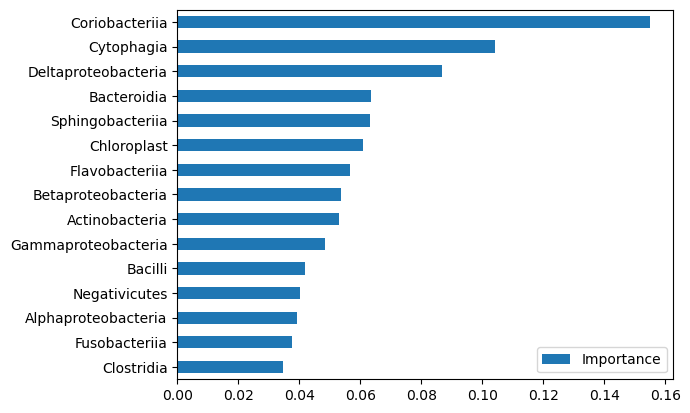

In [15]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [ ]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

In [17]:
np.shape(shap_valuesxgb)

(91, 42)

In [18]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=0, keepdims=True)

In [19]:
np.shape(shap_valuesxgb_mean)

(1, 42)

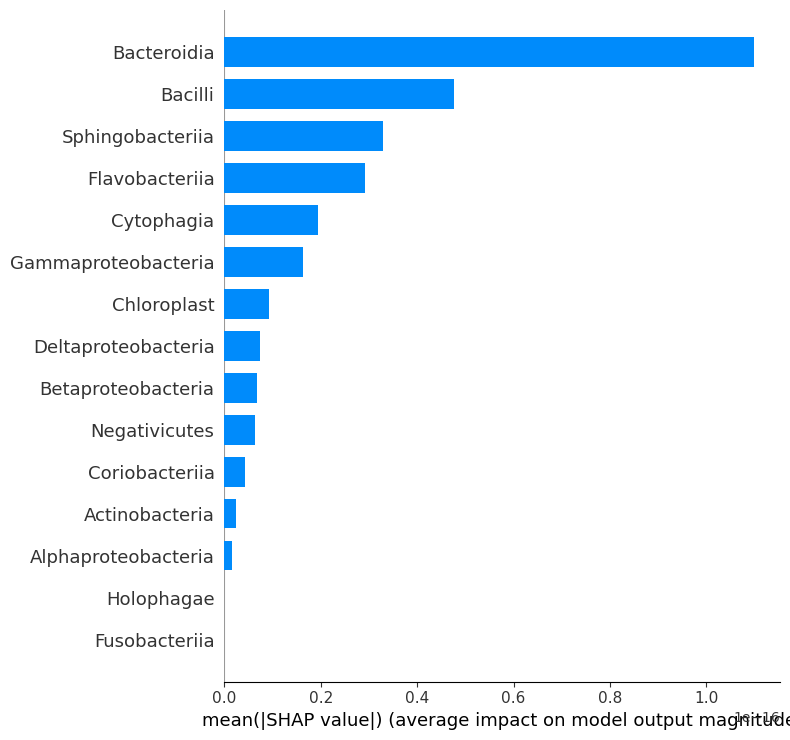

In [20]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15)

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
loolgbm = LeaveOneOut()
lgbm_scores = cross_validate(clflgbm, X, y, cv=loolgbm, scoring='accuracy', return_estimator=True)

In [ ]:
lgbm_scores

In [ ]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

In [24]:
feature_importances_complete_lgb

,Importance
Alphaproteobacteria,38
Flavobacteriia,36
Bacilli,32
Bacteroidia,31
Gammaproteobacteria,28
...,...
Gemmatimonadetes,0
Elusimicrobia,0
Coriobacteriia,0
Cyanobacteria,0


In [25]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [26]:
fic_lgb[:15]

,Importance
Flavobacteriia,40.087912
Bacilli,31.868132
Alphaproteobacteria,29.714286
Gammaproteobacteria,28.615385
Bacteroidia,28.483516
Clostridia,24.615385
Sphingobacteriia,21.967033
Betaproteobacteria,14.615385
Negativicutes,13.065934
Cytophagia,11.351648


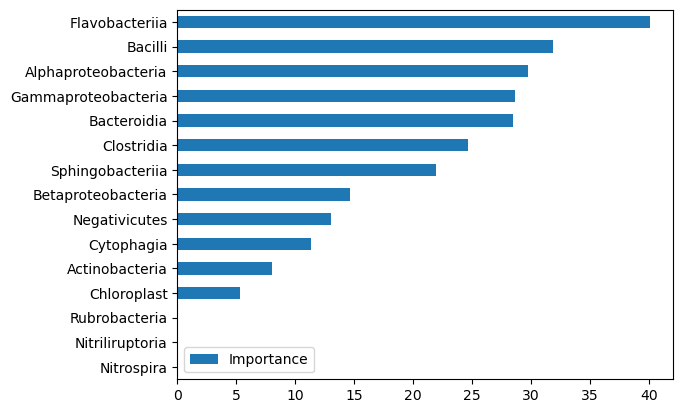

In [27]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [28]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [29]:
np.shape(shap_valueslgb)

(91, 42)

In [30]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=0, keepdims=True)

In [31]:
np.shape(shap_valueslgb_mean)

(1, 42)

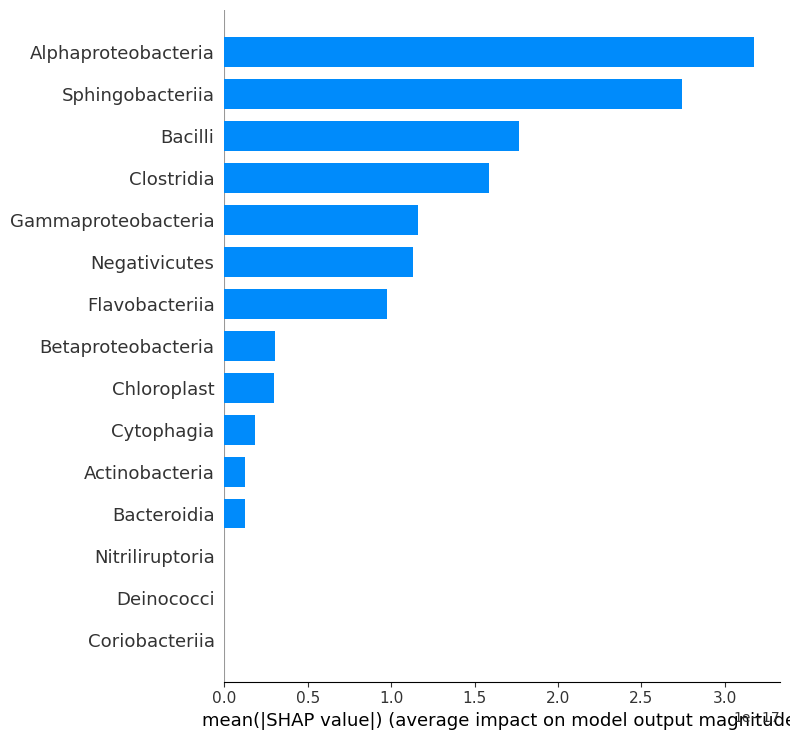

In [32]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15)

### Multilayer perceptron 

In [33]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

loomlp = LeaveOneOut()
mlp_scores = cross_validate(clfmlp, X, y, cv=loomlp, scoring='accuracy', return_estimator=True)

In [ ]:
mlp_scores

In [ ]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    print(f'The most important features for estimator {idx}:')
    print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

In [36]:
MLPfeatures.shape

(42, 2)

In [37]:
MLP_feature_importances_complete.shape

(3822, 2)

In [38]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [39]:
fic_mlp.shape

(42, 1)

In [40]:
fic_mlp[:15]

,Importance
Features,
Bacilli,0.132418
Actinobacteria,0.128022
Betaproteobacteria,0.091209
Cytophagia,0.052198
Clostridia,0.048901
Alphaproteobacteria,0.041209
Bacteroidia,0.040110
Chloroplast,0.028571
Flavobacteriia,0.023626


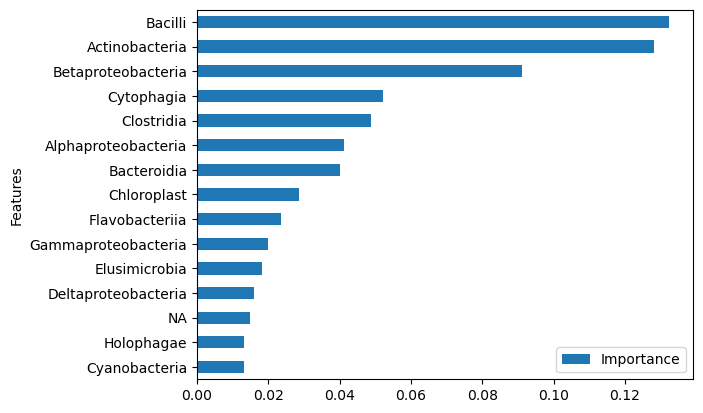

In [41]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [42]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

In [43]:
np.shape(shap_valuesmlp)

(91, 42)

In [44]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [45]:
np.shape(shap_valuesmlp_mean)

(1, 42)

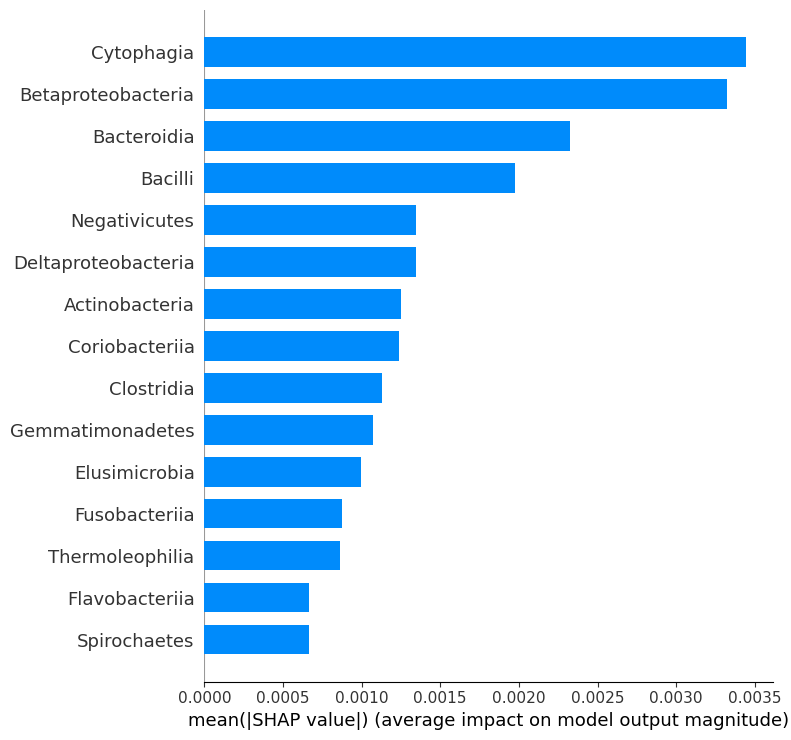

In [46]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15)